# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.7.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
df = pd.read_csv('tracks.csv')
#dataset = dataset.drop(dataset.columns[[0, 1, 5, 6, 7]], axis=1, inplace=True)
dataset = df[df.columns.difference(['id', 'name', 'artists', 'id_artists', 'release_date'])]
dataset.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence
0,0.674,0.645,126903,0.4450,0,0.7440,0,0.151,-13.338,1,6,0.4510,104.851,3,0.127
1,0.797,0.695,98200,0.2630,0,0.0000,0,0.148,-22.136,1,0,0.9570,102.009,1,0.655
2,0.994,0.434,181640,0.1770,0,0.0218,1,0.212,-21.180,1,0,0.0512,130.418,5,0.457
3,0.995,0.321,176907,0.0946,0,0.9180,7,0.104,-27.961,1,0,0.0504,169.980,3,0.397
4,0.989,0.402,163080,0.1580,0,0.1300,3,0.311,-16.900,0,0,0.0390,103.220,4,0.196


In [4]:
#X = dataset.iloc[:, 3:].values
dataset2 = dataset[dataset.columns.difference(['popularity'])]

X = dataset2.iloc[:, :].values
y = dataset.iloc[:, -5].values

print(X)
print(y)

[[6.74000e-01 6.45000e-01 1.26903e+05 ... 1.04851e+02 3.00000e+00
  1.27000e-01]
 [7.97000e-01 6.95000e-01 9.82000e+04 ... 1.02009e+02 1.00000e+00
  6.55000e-01]
 [9.94000e-01 4.34000e-01 1.81640e+05 ... 1.30418e+02 5.00000e+00
  4.57000e-01]
 ...
 [8.95000e-01 5.35000e-01 1.87601e+05 ... 1.45095e+02 4.00000e+00
  6.63000e-02]
 [2.06000e-01 6.96000e-01 1.42003e+05 ... 9.00290e+01 4.00000e+00
  4.38000e-01]
 [1.05000e-01 6.86000e-01 2.14360e+05 ... 1.12204e+02 4.00000e+00
  9.75000e-01]]
[ 6  0  0 ... 70 58 38]


### Encoding categorical data

Label Encoding the "Gender" column

In [5]:
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
'''

'\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nX[:, 2] = le.fit_transform(X[:, 2])\n'

In [6]:
print(X)

[[6.74000e-01 6.45000e-01 1.26903e+05 ... 1.04851e+02 3.00000e+00
  1.27000e-01]
 [7.97000e-01 6.95000e-01 9.82000e+04 ... 1.02009e+02 1.00000e+00
  6.55000e-01]
 [9.94000e-01 4.34000e-01 1.81640e+05 ... 1.30418e+02 5.00000e+00
  4.57000e-01]
 ...
 [8.95000e-01 5.35000e-01 1.87601e+05 ... 1.45095e+02 4.00000e+00
  6.63000e-02]
 [2.06000e-01 6.96000e-01 1.42003e+05 ... 9.00290e+01 4.00000e+00
  4.38000e-01]
 [1.05000e-01 6.86000e-01 2.14360e+05 ... 1.12204e+02 4.00000e+00
  9.75000e-01]]


### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [9]:
ann = tf.keras.models.Sequential()

Metal device set to: Apple M1


2022-01-01 14:42:42.819088: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-01 14:42:42.819230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Adding the input layer and the first hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(64, input_dim=14, activation='leaky_relu')) #must use REctifier act. func (RELU)

### Adding the second hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=32, activation='leaky_relu'))

### Adding the output layer

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

## Part 3 - Training the ANN

### Compiling the ANN

In [13]:
ann.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])


In [14]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


### Training the ANN on the Training set

In [15]:
history = ann.fit(X_train, y_train, validation_split=0.2, epochs = 100)

2022-01-01 14:42:42.918508: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-01-01 14:42:43.035936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11733/11734 [============================>.] - ETA: 0s - loss: 249.0604 - mae: 12.6880

2022-01-01 14:43:34.312079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11734/11734 [==============================] - 58s 5ms/step - loss: 249.0579 - mae: 12.6879 - val_loss: 235.1939 - val_mae: 12.2514
Epoch 2/100
11734/11734 [==============================] - 61s 5ms/step - loss: 233.7002 - mae: 12.2630 - val_loss: 231.4859 - val_mae: 12.1449
Epoch 3/100
11734/11734 [==============================] - 62s 5ms/step - loss: 230.2923 - mae: 12.1356 - val_loss: 229.2373 - val_mae: 12.0510
Epoch 4/100
11734/11734 [==============================] - 58s 5ms/step - loss: 228.3722 - mae: 12.0545 - val_loss: 226.1685 - val_mae: 11.9911
Epoch 5/100
11734/11734 [==============================] - 60s 5ms/step - loss: 227.1574 - mae: 12.0084 - val_loss: 226.0665 - val_mae: 11.9342
Epoch 6/100
11734/11734 [==============================] - 66s 6ms/step - loss: 226.1906 - mae: 11.9707 - val_loss: 223.7780 - val_mae: 11.9066
Epoch 7/100
11734/11734 [==============================] - 59s 5ms/step - loss: 225.3798 - mae: 11.9395 - val_loss: 226.5343 - val_mae: 11.9316
Epoc

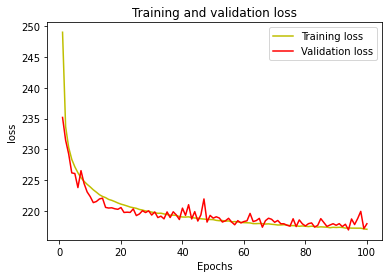

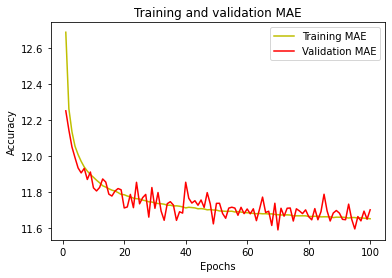

In [16]:
from matplotlib import pyplot as plt
#plot training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#Predictions on test data
predictions = ann.predict(X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[47.035934]
 [47.787197]
 [17.721573]
 [25.798347]
 [21.966389]]
Real values are:  [66 19 38  8  0]


2022-01-01 16:15:13.091571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [18]:
#compare with other models see which is better
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

#comparison with other models
#neural network of this code (this model)
mse_neural, mae_neural = ann.evaluate(X_test, y_test)
print('Mean Squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)


## linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean Squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)


## Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean Squared error from decision tree: ', mse_dt)
print('Mean absolute error from decision tree: ', mae_dt)


##Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state=30)
model.fit(X_train, y_train)

y_pred_RF = model.predict(X_test)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean Squared error from Random Forest: ', mse_RF)
print('Mean absolute error from Random Forest: ', mae_RF)

3667/3667 [==============================] - 12s 3ms/step - loss: 219.8569 - mae: 11.7405
Mean Squared error from neural net:  219.85691833496094
Mean absolute error from neural net:  11.740472793579102
Mean Squared error from linear regression:  261.56607096298575
Mean absolute error from linear regression:  13.12149229540495
Mean Squared error from decision tree:  412.66705124419275
Mean absolute error from decision tree:  15.450753652716507
Mean Squared error from Random Forest:  227.14916580993795
Mean absolute error from Random Forest:  11.780175465736146
